Data Scrapped from times of india and the hindu

Using GeoCoding Found the Lat and Long of the cities

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import os
os.chdir('/home/manobhav/PycharmProjects/demonetisation analysis')
ndata=pd.read_excel('Data/updated_articlesexcel.xlsx')
ndata.head()

,article_body,category,city,date,heading,sentiment,link,paper,lat,long,state
0,The currency demonetization came as a surprise...,entertainment,NaN,"Updated: Jan 24, 2017, 12.52 PM IST",Kannada film shoots stalled because of demonet...,-1,http://timesofindia.indiatimes.com//entertainm...,toi,NaN,NaN,NaN
1,CHENNAI: Travellers and tourists had a tough t...,city,chennai,"Nov 10, 2016, 01.47 AM IST","Demonetisation puts tourists in trouble, spoil...",-1,http://timesofindia.indiatimes.com//city/chenn...,toi,13.082680,80.270718,Tamil Nadu
2,PANAJI: Fortunes of the five offshore casino o...,city,goa,"Updated: Nov 10, 2016, 12.28 PM IST",Currency demonetization puts odds against casinos,-1,http://timesofindia.indiatimes.com//city/goa/C...,toi,15.299326,74.123996,Goa
3,Even as gold prices surged to a four-month hig...,business,NaN,"Nov 10, 2016, 04.00 AM IST","Demonetisation hits jewellery, realty stocks",-1,http://timesofindia.indiatimes.com//business/i...,toi,NaN,NaN,NaN
4,"Nagpur: Like most parts of the country, the ci...",city,nagpur,"Nov 10, 2016, 04.23 AM IST",Vid towns witness chaos following demonetization,-1,http://timesofindia.indiatimes.com//city/nagpu...,toi,21.145800,79.088155,Maharashtra


In [43]:
ndata.loc[(ndata['category']=='city')&(ndata['city']=='kochi')&(ndata['sentiment']==1),['heading','link']]

,heading,link
7,Demonetisation move to curb Kerala's undergrou...,http://timesofindia.indiatimes.com//city/kochi...
102,Demonetisation: Defaulters settle bad loans wi...,http://timesofindia.indiatimes.com//city/kochi...
107,Demonetisation: Defaulters settle bad loans wi...,http://timesofindia.indiatimes.com//city/kochi...


In [22]:
temp=pd.crosstab(ndata['category'],ndata['sentiment']).apply(lambda r:r/r.sum(),axis=1)

temp

sentiment,-1,1
category,,
business,0.615385,0.384615
city,0.708333,0.291667
entertainment,0.214286,0.785714
india,0.375000,0.625000
world,1.000000,0.000000


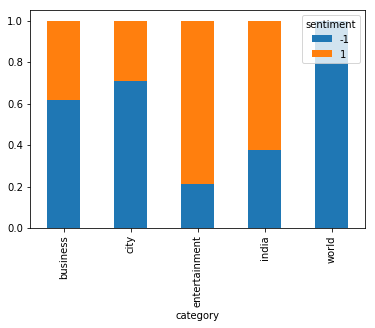

In [24]:
temp.plot(kind='bar',stacked=True)

In [39]:
pd.DataFrame(temp.idxmax(axis=0))

,0
sentiment,
-1,world
1,entertainment


In [25]:
city_sentiment=pd.crosstab(ndata['city'],ndata['sentiment'])

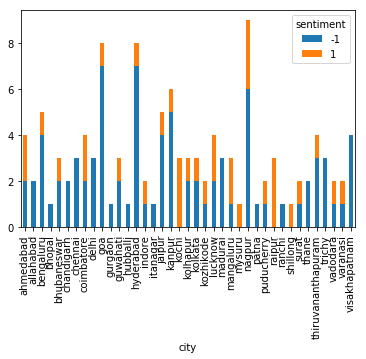

In [26]:
city_sentiment.plot(kind='bar',stacked=True)

In [40]:
pd.DataFrame(city_sentiment.idxmax(axis=0))

,0
sentiment,
-1,goa
1,kochi


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f029fb847f0>], dtype=object)

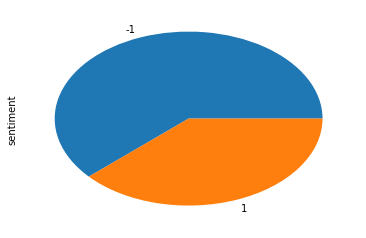

In [49]:
pd.value_counts(ndata['sentiment']).plot(kind='pie',subplots=True)

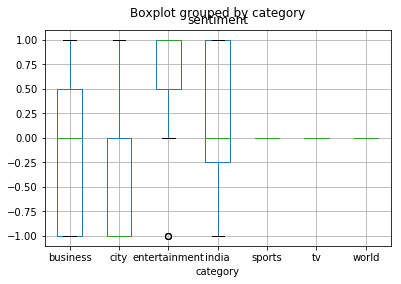

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

ndata.boxplot(column='sentiment',by='category')


In [51]:
ndata=ndata.loc[ndata.sentiment==-1]

In [55]:
from mpl_toolkits.basemap import Basemap
m=Basemap(projection='mill',llcrnrlat=ndata.lat.min()-2,urcrnrlat=ndata.lat.max()+2,llcrnrlon=ndata.long.min()-2,urcrnrlon=ndata.long.max()+2,resolution='c',epsg=4269)
x,y=m(tuple(ndata.long[(ndata.long.isnull()==False)]),tuple(ndata.lat[(ndata.lat.isnull()==False)]))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=70.5713621,6.524139099999999,95.60531630000001,32.7333148&bboxSR=4269&imageSR=4269&size=400,418&dpi=96&format=png32&f=image


/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


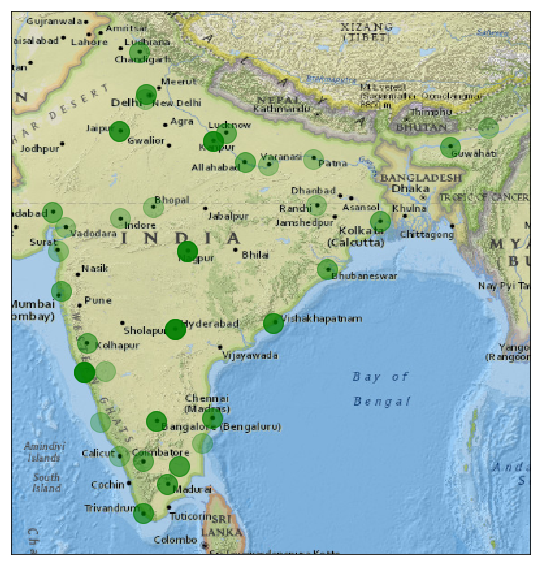

In [61]:
plt.figure(figsize=(20,10))
m.arcgisimage(service="NatGeo_World_Map", verbose=True)
m.plot(x,y,'ro',markersize=20, alpha=0.3,color='green')

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=70.5713621,6.524139099999999,95.60531630000001,32.7333148&bboxSR=4269&imageSR=4269&size=400,418&dpi=96&format=png32&f=image


/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


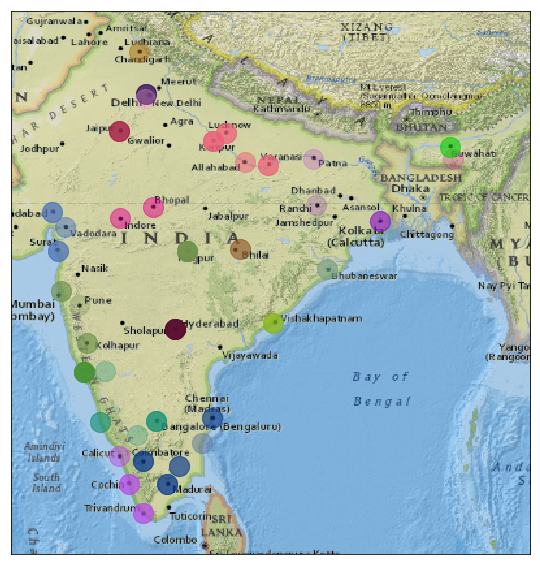

In [12]:
color = np.random.rand(ndata.state[(ndata.long.isnull()==False)].unique().shape[0], 3)
plt.figure(figsize=(20,10))
m1=Basemap(projection='mill',llcrnrlat=ndata.lat.min()-2,urcrnrlat=ndata.lat.max()+2,llcrnrlon=ndata.long.min()-2,urcrnrlon=ndata.long.max()+2,resolution='c',epsg=4269)
m1.arcgisimage(service="NatGeo_World_Map", verbose=True)
c = 0
for i in ndata.state[(ndata.long.isnull()==False)].unique():
    x1, y1 = m(tuple(ndata.long[(ndata.long.isnull()==False) & (ndata.state == i)]), \
         tuple(ndata.lat[(ndata.lat.isnull() == False) & (ndata.state == i)]))
    m1.plot(x1,y1,'ro',markersize=20,alpha=0.3, color = color[c] )
    c += 1


In [13]:
%config IPCompleter.greedy=True

In [14]:
def myfunc(x):
    if x.split(' ')[0]=='Updated:':
        s=(' ').join(x.split(' ')[1:])
    else:
        s=x
    return pd.to_datetime(s,format="%b %d, %Y, %I.%M %p %Z")
    

ndata.date=ndata.date.apply(myfunc)

In [15]:
ndata['year']=ndata.date.dt.year
ndata['month']=ndata.date.dt.month
ndata['day']=ndata.date.dt.day
ndata.head()

,article_body,category,city,date,heading,sentiment,link,paper,lat,long,state,year,month,day
0,The currency demonetization came as a surprise...,entertainment,NaN,2017-01-24 12:52:00,Kannada film shoots stalled because of demonet...,-1,http://timesofindia.indiatimes.com//entertainm...,toi,NaN,NaN,NaN,2017,1,24
1,CHENNAI: Travellers and tourists had a tough t...,city,chennai,2016-11-10 01:47:00,"Demonetisation puts tourists in trouble, spoil...",-1,http://timesofindia.indiatimes.com//city/chenn...,toi,13.082680,80.270718,Tamil Nadu,2016,11,10
2,PANAJI: Fortunes of the five offshore casino o...,city,goa,2016-11-10 12:28:00,Currency demonetization puts odds against casinos,-1,http://timesofindia.indiatimes.com//city/goa/C...,toi,15.299326,74.123996,Goa,2016,11,10
3,Even as gold prices surged to a four-month hig...,business,NaN,2016-11-10 04:00:00,"Demonetisation hits jewellery, realty stocks",-1,http://timesofindia.indiatimes.com//business/i...,toi,NaN,NaN,NaN,2016,11,10
4,"Nagpur: Like most parts of the country, the ci...",city,nagpur,2016-11-10 04:23:00,Vid towns witness chaos following demonetization,-1,http://timesofindia.indiatimes.com//city/nagpu...,toi,21.145800,79.088155,Maharashtra,2016,11,10


In [16]:
group=ndata.groupby(['year','month'])['day'].count()
group.head(20)

year  month
2016  11       185
2017  1         11
      2          3
Name: day, dtype: int64

Show the Classifier Scikit and nltk

In [7]:
frame=pd.read_csv('Data/demonet.csv')
frame

,Date,Heading,Article,Category,Paper,Link,City,Sentiment
0,2016-11-09 06:32:00,Currency demonetisation: RBI got 6 months to p...,"NEW DELHI: Around six months ago, the governme...",business,toi,http://timesofindia.indiatimes.com//business/i...,NaN,-1
1,2016-11-09 13:25:00,Demonetisation move to create corruption-free ...,NEW DELHI: The decision to scrap Rs 500 and Rs...,india,toi,http://timesofindia.indiatimes.com//india/Demo...,NaN,1
2,2016-11-09 11:14:00,Demonetisation leads to chaos on Delhi-Gurgaon...,GURUGRAM: The ban on Rs 500 and Rs 1000 curren...,city,toi,http://timesofindia.indiatimes.com//city/gurga...,gurgaon,-1
3,2016-11-10 12:28:00,Currency demonetization puts odds against casinos,PANAJI: Fortunes of the five offshore casino o...,city,toi,http://timesofindia.indiatimes.com//city/goa/C...,goa,-1
4,2017-01-24 12:52:00,Kannada film shoots stalled because of demonet...,The currency demonetization came as a surprise...,entertainment,toi,http://timesofindia.indiatimes.com//entertainm...,NaN,-1
5,2016-11-10 01:47:00,"Demonetisation puts tourists in trouble, spoil...",CHENNAI: Travellers and tourists had a tough t...,city,toi,http://timesofindia.indiatimes.com//city/chenn...,chennai,-1
6,2016-11-10 04:00:00,"Demonetisation hits jewellery, realty stocks",Even as gold prices surged to a four-month hig...,business,toi,http://timesofindia.indiatimes.com//business/i...,NaN,-1
7,2016-11-10 04:23:00,Vid towns witness chaos following demonetization,"Nagpur: Like most parts of the country, the ci...",city,toi,http://timesofindia.indiatimes.com//city/nagpu...,nagpur,-1
8,2016-11-10 06:32:00,Centre's demonetisation move impacts businesse...,KOLHAPUR: The first day after Prime Minister N...,city,toi,http://timesofindia.indiatimes.com//city/kolha...,kolhapur,-1
9,2016-11-10 06:00:00,CASH CONUNDRUM CONTINUESRealty prices may drop...,Visakhapatnam: With the central government ann...,city,toi,http://timesofindia.indiatimes.com//city/visak...,visakhapatnam,-1


In [8]:
frame.Date=pd.to_datetime(frame.Date).dt.normalize()
frame.Date


0      2016-11-09
1      2016-11-09
2      2016-11-09
3      2016-11-10
4      2017-01-24
5      2016-11-10
6      2016-11-10
7      2016-11-10
8      2016-11-10
9      2016-11-10
10     2016-11-10
11     2016-11-10
12     2016-11-10
13     2016-11-10
14     2016-11-10
15     2016-11-10
16     2016-11-10
17     2016-11-10
18     2017-01-29
19     2016-11-10
20     2016-11-11
21     2016-11-11
22     2016-11-11
23     2016-11-11
24     2016-11-11
25     2016-11-11
26     2016-11-11
27     2016-11-11
28     2016-11-11
29     2016-11-11
          ...    
1684   2017-01-02
1685   2017-01-02
1686   2017-01-02
1687   2017-01-02
1688   2017-01-02
1689   2017-01-02
1690   2017-01-03
1691   2017-01-03
1692   2017-01-03
1693   2017-01-03
1694   2017-01-03
1695   2017-01-03
1696   2017-01-03
1697   2017-01-03
1698   2017-01-03
1699   2017-01-03
1700   2017-01-04
1701   2017-01-05
1702   2017-01-05
1703   2017-01-05
1704   2017-01-05
1705   2017-01-05
1706   2017-01-05
1707   2017-01-05
1708   201

In [10]:
frame.sort_values(by='Date',inplace=True)
frame.Date.head(5)

497   2016-11-08
498   2016-11-08
499   2016-11-08
500   2016-11-08
503   2016-11-09
Name: Date, dtype: datetime64[ns]

In [16]:
frame['year']=frame.Date.dt.year
frame['month']=frame.Date.dt.month
frame['day']=frame.Date.dt.day


In [21]:
from datetime import datetime,timedelta
d1 = datetime.strptime('2016-11-08', "%Y-%m-%d")-timedelta(days=1)
d2 = datetime.strptime('2016-12-01', "%Y-%m-%d")+timedelta(days=1)
alldata=frame[(frame.Sentiment.isin([-1,1]))&(frame.Paper.isin(['toi']))&(frame.Date > d1) & (frame.Date < d2)]
Group = alldata[alldata.Sentiment==-1].groupby(['year','month','day'])['day'].count() / alldata.groupby(['year','month','day'])['day'].count()
Group

year    month  day 
2016.0  11.0   9.0     0.666667
               10.0    1.000000
               11.0    0.500000
               12.0         NaN
               13.0         NaN
               14.0    0.954545
               15.0    1.000000
               16.0    1.000000
               17.0    1.000000
               18.0    0.052632
               19.0         NaN
               20.0         NaN
               21.0         NaN
               22.0         NaN
               23.0         NaN
               24.0         NaN
               25.0         NaN
               26.0         NaN
               27.0         NaN
               28.0         NaN
               29.0         NaN
               30.0         NaN
        12.0   1.0          NaN
Name: day, dtype: float64

/home/manobhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2016.0, right=2016.0
  'left=%s, right=%s') % (left, right))


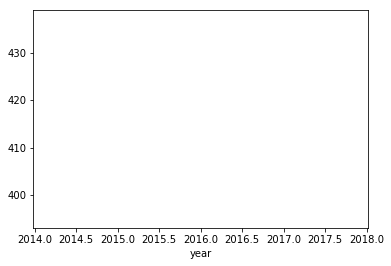

In [20]:
Group = alldata.groupby(['year'])['day'].count()
Group.plot(kind='line')

In [8]:
f=frame.loc[frame.Sentiment==-1 or 1]
Group=f.groupby(['year'])['day'].count()/frame.groupby(['year'])['day'].count()
Group.plot(kind='line')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [48]:
from datetime import datetime
d1 = datetime.strptime('2016-12-30', "%Y-%m-%d")
d2 = datetime.strptime('2017-01-03', "%Y-%m-%d")
mydata=frame.loc[(frame.Date>d1)&(frame.Date<d2)]
mydata

,Date,Heading,Article,Category,Paper,Link,City,Sentiment,year,month,day
0,2016-12-31,Demonetization effect: Labourers skipping meal...,"AHMEDABAD: Sharda Jhala, a farm labourer from ...",city,toi,http://timesofindia.indiatimes.com//city/ahmed...,ahmedabad,-1,2016,12,31
1,2016-12-31,Endurance triumphs over demonetisation,"MADURAI: Surprised, stunned, panicked, resting...",city,toi,http://timesofindia.indiatimes.com//city/madur...,madurai,1,2016,12,31
2,2016-12-31,Demonetisation: Congress bandh gets tepid resp...,RAIPUR: The one-day bandh by opposition Congre...,city,toi,http://timesofindia.indiatimes.com//city/raipu...,raipur,-1,2016,12,31
3,2016-12-31,"December 30, just another ‘demonetized’ day fo...",PANAJI: December 30 - the deadline to exchange...,city,toi,http://timesofindia.indiatimes.com//city/goa/D...,goa,-1,2016,12,31
4,2016-12-31,"51 days post demonetisation, hospitals in Utta...",MEERUT: While the central government has urged...,city,toi,http://timesofindia.indiatimes.com//city/meeru...,meerut,-1,2016,12,31
5,2016-12-31,"Demonetisation has caused economic anarchy, co...",NAGPUR: Rajya Sabha member and Congress nation...,city,toi,http://timesofindia.indiatimes.com//city/nagpu...,nagpur,-1,2016,12,31
6,2016-12-31,Demonetisation effect: Karnataka could lose Rs...,BENGALURU: If the prediction of the state gove...,india,toi,http://timesofindia.indiatimes.com//india/demo...,NaN,1,2016,12,31
7,2016-12-31,Demonetisation eats up jobs of casual laborers...,JAIPUR: Demonetisation has hit casual labourer...,city,toi,http://timesofindia.indiatimes.com//city/jaipu...,jaipur,1,2016,12,31
8,2016-12-31,Demonetisation has taken India economy back by...,MANGALURU: Move to demonetize high value curre...,city,toi,http://timesofindia.indiatimes.com//city/manga...,mangaluru,-1,2016,12,31
9,2016-12-31,"Demonetisation wrong, say 54.6% Jaipur daily w...",JAIPUR: A survey of 737 daily wage labourers a...,city,toi,http://timesofindia.indiatimes.com//city/jaipu...,jaipur,-1,2016,12,31


In [35]:
k=frame[(frame.Sentiment.isin([-1,1]))&(frame.Paper.isin(['toi','The Hindu']))]
m=pd.DataFrame()
m=m.append(k)
m


,Date,Heading,Article,Category,Paper,Link,City,Sentiment,year,month,day
0,2016-12-31,Demonetization effect: Labourers skipping meal...,"AHMEDABAD: Sharda Jhala, a farm labourer from ...",city,toi,http://timesofindia.indiatimes.com//city/ahmed...,ahmedabad,-1,2016,12,31
1,2016-12-31,Endurance triumphs over demonetisation,"MADURAI: Surprised, stunned, panicked, resting...",city,toi,http://timesofindia.indiatimes.com//city/madur...,madurai,1,2016,12,31
2,2016-12-31,Demonetisation: Congress bandh gets tepid resp...,RAIPUR: The one-day bandh by opposition Congre...,city,toi,http://timesofindia.indiatimes.com//city/raipu...,raipur,-1,2016,12,31
3,2016-12-31,"December 30, just another ‘demonetized’ day fo...",PANAJI: December 30 - the deadline to exchange...,city,toi,http://timesofindia.indiatimes.com//city/goa/D...,goa,-1,2016,12,31
4,2016-12-31,"51 days post demonetisation, hospitals in Utta...",MEERUT: While the central government has urged...,city,toi,http://timesofindia.indiatimes.com//city/meeru...,meerut,-1,2016,12,31
5,2016-12-31,"Demonetisation has caused economic anarchy, co...",NAGPUR: Rajya Sabha member and Congress nation...,city,toi,http://timesofindia.indiatimes.com//city/nagpu...,nagpur,-1,2016,12,31
6,2016-12-31,Demonetisation effect: Karnataka could lose Rs...,BENGALURU: If the prediction of the state gove...,india,toi,http://timesofindia.indiatimes.com//india/demo...,NaN,1,2016,12,31
7,2016-12-31,Demonetisation eats up jobs of casual laborers...,JAIPUR: Demonetisation has hit casual labourer...,city,toi,http://timesofindia.indiatimes.com//city/jaipu...,jaipur,1,2016,12,31
8,2016-12-31,Demonetisation has taken India economy back by...,MANGALURU: Move to demonetize high value curre...,city,toi,http://timesofindia.indiatimes.com//city/manga...,mangaluru,-1,2016,12,31
9,2016-12-31,"Demonetisation wrong, say 54.6% Jaipur daily w...",JAIPUR: A survey of 737 daily wage labourers a...,city,toi,http://timesofindia.indiatimes.com//city/jaipu...,jaipur,-1,2016,12,31
